In [46]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### 1. Метричесие пространства. Полные метрические пространства

Метрическом пространством называется пара **(X, ρ)**, состоящая из множества X и заданного на этом множестве расстояния (метрики) **ρ**, т.е. действительной, неотрицательной функции двух элементов множества, удовлетворяющей аксиомам расстояния:

##### 1. ρ(*x,y*) = 0 ⟺ *x = y*
##### 2. ∀ *x,y* ∈ *X*   ρ(*x,y*) = ρ(*y,x*)  (аксиома симметрии)
##### 3. ∀ *x,y,z* ∈ *X*   ρ(*x,z*) <= ρ(*x,y*) + ρ(*y,z*)  (аксиома треугольника)

In [47]:
# УПРАЖНЕНИЕ 1

def distance_between_two_points(a: list, b: list, type_of_metrics: str = "euclid") -> (None | int):
    """
    Counts distance between two given points \n
    You can specify a metric to count: \n
    1) By maximum modulus of difference between coordinates \n
    2) By sum of modulus of difference between coordinates \n
    3) By Euclid's metrics : sqrt( sum( square of difference ) ) 
    """
    Metrics = ["max_mod", "sum_mod", "euclid"]
    if ( len(a) != len(b)):
        return "a and b are not same dimensional arrays !"
    if type_of_metrics not in Metrics:
        return f"Wrong metrics !\n \
                These are valid ones: \n \
                {Metrics}"
    
    if type_of_metrics == "euclid":
        return np.sqrt( sum( (b[j] - a[j])**2 for j in range(len(a))))
    if type_of_metrics == "max_mod":
        return max( np.abs(b[i] - a[i]) for i in range(len(a)))
    if type_of_metrics == "sum_mod":
        return sum( np.abs(b[i] - a[i]) for i in range(len(a)))  
    

def find_vector_coords(a,b: list):
    """
    Gets two points as arrays: a, b \n
    Returns a single Point - Vector coordinates = (x1, ... , xn)\n
    NOTE: 
    Coordinates are contered as vector from point a to point b
    """
    if ( len(a) != len(b)):
        return "a and b are not same dimensional arrays !"
    vector = []
    for i in range(len(a)):
        vector.append(b[i] - a[i])
    return vector

##################################################
print(distance_between_two_points( [0,0], [3,4] ))
print(distance_between_two_points( [0,0], [4,3] ))

print(f"{distance_between_two_points( [1,2,3,4], [7,3,4,200], type_of_metrics='max_mod' ):3.3f}", "- Max mod metrics")
print(f"{distance_between_two_points( [1,2,3,4], [7,3,4,200], type_of_metrics='sum_mod' ):3.3f}", "- Sum mod metrics")
print(f"{distance_between_two_points( [1,2,3,4], [7,3,4,200] ):3.3f}", "- Euclid metrics")


5.0
5.0
196.000 - Max mod metrics
204.000 - Sum mod metrics
196.097 - Euclid metrics


### Открытый шар $B_{x_0r}$
Это множество точек $x$ метрического пространства $(X,ρ)$, для которых $ρ(x,x_0) < r $

### Замкнутый шар $\overline{B_{x_0r}}$
Это множество точек $x$ метрического пространства $(X,ρ)$, для которых $ρ(x,x_0) ≤ r $

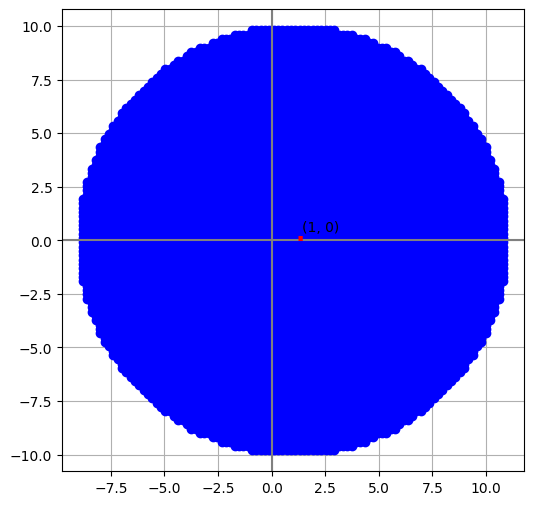

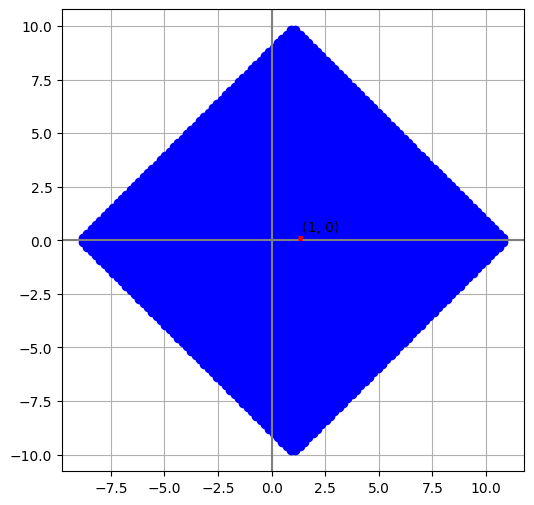

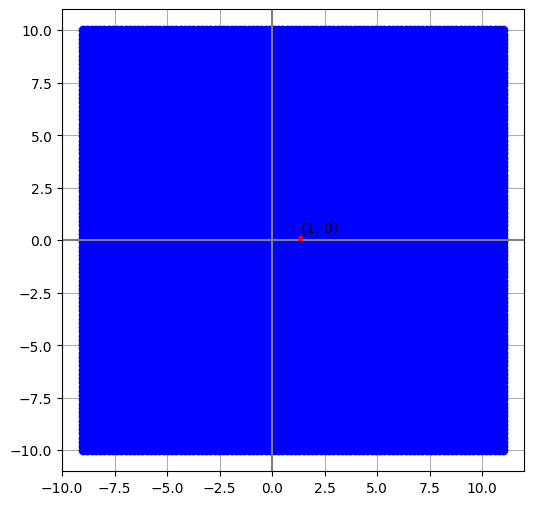

In [48]:
# УПРАЖНЕНИЕ 2
'''
def _(O: list = [], r: float = 1, metric: str = "euclid"):
    #Metrics = ["max_mod", "sum_mod", "euclid"]
    #for metric in Metrics:
    #R = max(distance_between_two_points(O, [1,1], type_of_metrics = metric))
    # ' ' '
    R = max from all distances for all x-es
    such that they satisfy the requirement:
    ro(X, X0) <= R
    # ' ' '
    R = distance_between_two_points(O, [O[0] + 1, O[1] + 1], metric)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    plt.grid()
    Circle_1 = plt.Circle((O[0], O[1]), radius = R, color = "#bfbfbf")
    ax.add_patch(Circle_1)
    ax.axis("equal")
    theta = np.linspace(0, 2*np.pi, 1000)
    plt.plot(R * np.cos(theta) + O[0], R * np.sin(theta) + O[1], "--", color="#000000")
    return

_(O = [1,2], metric="sum_mod")
_(O = [1,2], metric="max_mod")
plt.show()
'''
def plot_it(radius, x0 = 0, y0 = 0, metric = "euclid"):
    plt.figure(figsize=(6,6))
    N = 100
    X = np.linspace(x0 - radius, x0 + radius, N)
    Y = np.linspace(y0 - radius, y0 + radius, N)
    for x in X:
        for y in Y:
            if (distance_between_two_points([x0, y0], [x, y], metric) <= radius):
                plt.plot(x, y, 'bo')  # Точка внутри шара
    #plt.plot(x0, y0, linewidth=3, color="red")
    plt.text(x0 + .4, y0 + .4, f"({x0}, {y0})")
    plt.text(x0, y0, ".", fontsize=30, color="#FF0000")

def normalize_plot():
    plt.axis("square")
    plt.axvline(x=0, color="gray")
    plt.axhline(y=0, color="gray")
    plt.grid()

radius_, x0_, y0_ = 10, 1, 0
Metrics = ["euclid", "sum_mod", "max_mod"]
for metric_ in Metrics:
    plot_it(radius_, x0 = x0_, y0 = y0_, metric = metric_)
    normalize_plot()

### 2. Принцип сжимающихся отображений. Метод итераций.
Последовательность точек {$x_n$} метрического пространства $(X,ρ)$ называется $фундаментальой$, если ∀ ε > 0 ∃ $n_0$ ∈ $N$ : $m,n > n_0$ => ρ($x_n, x_m$) < ε

Метрическое пространство $(X,ρ)$ называется $полным$, если всякая фундаментальная последовательность в нём сходится, т.е. для этого пространства справедлив критерий КОШИ сходимости последовательности

---

##### Пусть $(X,ρ)$ - полное метрическое пространство. Оператор А, отображающий $X$ в $X$  называется $сжимающим$, если:
∃ α<1 : ∀ $x, y$ ∈ $R$ => ρ($Ax, Ay$) $≤$ $αρ(x,y)$

---

...

Для $x_n$ :
$ρ(x_0,y_n) ≤ $ $\dfrac{α^n ρ(x_1,y_2)}{1 - α}$

=>

$\dfrac{α^n ρ(x_1,y_2)}{1 - α} < ε$

=>

$n > \dfrac{ln(ε(1 - α)) - ln(ρ(x_1,y_2))}{lnα}$


In [49]:
# УПРАЖНЕНИЕ 3
x1, N = 3, 10
def squeeze(f, n, x1):
    if n == 0: return 0
    if n == 1:
        return x1
    return f.subs(x, squeeze(f, n - 1, x1) ).evalf()

x = sp.symbols("x")
for i in range(1,N+1):
    print(f"n = {i:2} | x_n = {squeeze(sp.tan(x), i, x1)}")

n =  1 | x_n = 3
n =  2 | x_n = -0.142546543074278
n =  3 | x_n = -0.143519947784929
n =  4 | x_n = -0.144513541783747
n =  5 | x_n = -0.145528032164621
n =  6 | x_n = -0.146564161163058
n =  7 | x_n = -0.147622708432909
n =  8 | x_n = -0.148704493505944
n =  9 | x_n = -0.149810378451857
n = 10 | x_n = -0.150941270758321


In [54]:
# УПРАЖНЕНИЕ 4
# f(x) = x
# 3x^3 + cos(x) = 2
# =>
# x^3 = 1/3 * (2 - cos(x))
# x = cbrt( 1/3 * (2 - cos(x)) )

def fx_x(f, alpha, x1, epsilon):
    a = sp.diff(f, x)
    
    alpha = float(max(a.subs(x, x_value).evalf() for x_value in np.linspace(0, np.pi*2, 1000)))
    n = np.log(epsilon * (1 - alpha)) 
    n -= np.log(distance_between_two_points([x1], [ float(squeeze(f, 2, x1) ) ]) )
    n /= np.log(alpha)
    return squeeze(f, int(np.ceil(n)), x1)
    
x = sp.symbols("x")
fx = sp.cbrt((1/3) * (2 - sp.cos(x)))

print(fx_x(fx, 0.9, 1, 0.0001)) # 0.750624532344841
# print("\n"); sp.pprint(sp.diff(fx, x)); print("\n")
print("\nПроверка: f(x) - x в найденной точке:", (fx - x).subs(x, fx_x(fx, 0.9, 1, 0.0001)))

0.750701276869228

Проверка: f(x) - x в найденной точке: -7.67445243868847e-5


In [55]:
# УПРАЖНЕНИЕ 5
# B + CX = X
# ВАРИАНТ 4
A = np.matrix([ [ 7.26, -0.12,  0.23], 
                [-0.45,  0.89,  4.12], 
                [ 0.15,  3.62, -0.12] ])
B = np.matrix([ [-4.42 ], 
                [ 8.23 ], 
                [ 7.54 ] ])
E = np.eye(3)

C = -A + E

def _(Matrix: np.matrix):
    id_ = []
    for i in range(Matrix.shape[0]):
        max_ = np.abs(Matrix[i, 0])
        for j in range(1, Matrix.shape[1]):
            if (np.abs(Matrix[i, j]) > max_): max_ = np.abs(Matrix[i, j])
        for j in range(Matrix.shape[1]):
            if (np.abs(Matrix[i, j]) == max_): id_.append(j)
    return id_

def rearange(Matrix: np.matrix, order: list[int], Equal_Matrix: np.matrix):
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[0] - 1):
            if order[j] > order[j + 1]:
                order[j], order[j + 1] = order[j + 1], order[j]
                Matrix[[j, j + 1]] = Matrix[[j + 1, j]]
                Equal_Matrix[[j, j + 1]] = Equal_Matrix[[j + 1, j]]
print(A)
rearange(A, _(A), B)
print("---------------------")
print(A)
print(B)

[[ 7.26 -0.12  0.23]
 [-0.45  0.89  4.12]
 [ 0.15  3.62 -0.12]]
---------------------
[[ 7.26 -0.12  0.23]
 [ 0.15  3.62 -0.12]
 [-0.45  0.89  4.12]]
[[-4.42]
 [ 7.54]
 [ 8.23]]


In [56]:
def normalize(Matrix: np.matrix, Equal_Matrix: np.matrix):
    values = [Matrix[i, i] for i in range(Matrix.shape[0])]
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            Matrix[i,j] /= values[i]
        Equal_Matrix[i] /= values[i]

normalize(A, B)
C = E - A
print(C)

print("\n", B)

[[ 0.          0.01652893 -0.03168044]
 [-0.04143646  0.          0.03314917]
 [ 0.1092233  -0.21601942  0.        ]]

 [[-0.60881543]
 [ 2.08287293]
 [ 1.99757282]]


In [57]:
def solution(Matrix: np.matrix, Equal_matrix: np.matrix, epsilon: int):
    X = Equal_matrix
    X1 = B + Matrix * X

    while (abs(X[0,0] - X1[0,0]) > epsilon):
        X = X1
        X1 = B + Matrix * X
    
    return X

Accuracy = .0001
print(solution(C, B, Accuracy))

print("\nПроверка: (должны быть нули (примерно))\n", A * solution(C, B, Accuracy) - B)

[[-0.61953245]
 [ 2.15705389]
 [ 1.46399575]]

Проверка: (должны быть нули (примерно))
 [[ 9.22714913e-06]
 [-2.05202178e-05]
 [ 5.58366084e-05]]
